Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                

C:\ProgramData\Anaconda3\envs\tf_V2\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 34s 1ms/step - loss: 0.4776 - accuracy: 0.7510 - val_loss: 0.3408 - val_accuracy: 0.8467
Epoch 2/20
25000/25000 [==============================] - 37s 1ms/step - loss: 0.2992 - accuracy: 0.8740 - val_loss: 0.3256 - val_accuracy: 0.8561
Epoch 3/20
25000/25000 [==============================] - 37s 1ms/step - loss: 0.2524 - accuracy: 0.8982 - val_loss: 0.3297 - val_accuracy: 0.8558
Epoch 4/20
25000/25000 [==============================] - 34s 1ms/step - loss: 0.2201 - accuracy: 0.9141 - val_loss: 0.3393 - val_accuracy: 0.8560
Epoch 5/20
25000/25000 [==============================] - 34s 1ms/step - loss: 0.1842 - accuracy: 0.9299 - val_loss: 0.3406 - val_accuracy: 0.8534
Epoch 6/20
25000/25000 [==============================] - 34s 1ms/step - loss: 0.1536 - accuracy: 0.9436 - val_loss: 0.3912 - val_accuracy: 0.8479
Epoch 7/20
25000/25000 [==============================] - 34s 1ms/st

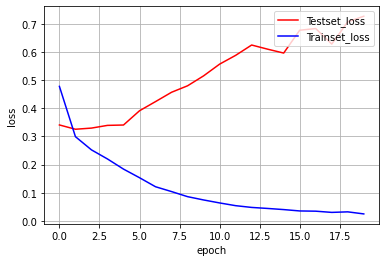

In [4]:
from keras.datasets import imdb
from keras.layers import Dense,Embedding,Dropout,LSTM,Conv1D,MaxPooling1D,Activation
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=5000)
x_train = pad_sequences(x_train,100)
x_test = pad_sequences(x_test,100)

model=Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid',activation = 'relu',strides = 1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs = 20, verbose = 1, batch_size = 128, validation_data = (x_test,y_test))

y_valloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_valloss,'-',c='red',label = 'Testset_loss')
plt.plot(x_len,y_loss,'-',c='blue',label = 'Trainset_loss')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
